In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import wrangle
import env

seed =21

# Using the mall_customers dataset

In [2]:
url = env.get_connection('mall_customers')
query = 'select * from customers'
df = pd.read_sql(query,url)

In [3]:
train, X_train, y_train, X_val, y_val, X_test, y_test = wrangle.split_data(df,'gender')

In [4]:
inertia = [] 
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train[['annual_income','spending_score']])
    inertia.append(kmeans.inertia_)


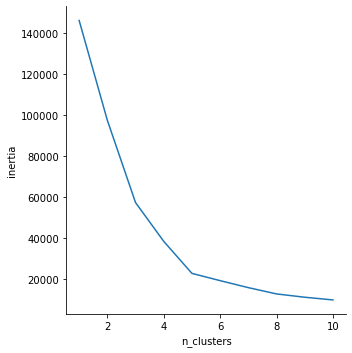

In [5]:
sns.relplot(data=pd.DataFrame({'n_clusters':list(range(1,11)),'inertia':inertia}),x='n_clusters',y='inertia',kind='line')

n_clusters = 5 has the largest acute angle

In [6]:
clusts = X_train[['annual_income','spending_score']]

In [7]:
kmeans = KMeans(n_clusters=5,random_state=seed)
kmeans.fit(X_train[['annual_income','spending_score']])
clusts['unscaled_clust'] = kmeans.predict(X_train[['annual_income','spending_score']])

/var/folders/fz/0282wvb93rn0lm_p0nscw1sm0000gn/T/ipykernel_2519/2608176801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusts['unscaled_clust'] = kmeans.predict(X_train[['annual_income','spending_score']])


In [8]:
X_train,X_val,X_test = wrangle.scale_minmax(X_train,X_val,X_test)

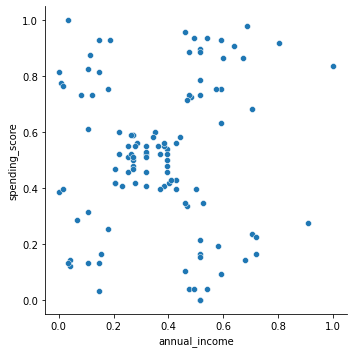

In [9]:
sns.relplot(data=X_train,x='annual_income',y='spending_score')

In [10]:
inertia = []
seed = 21
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(X_train[['annual_income','spending_score']])
    inertia.append(kmeans.inertia_)

In [11]:
clust_inert = pd.DataFrame({'n_clusters':list(range(1,10)),'inertia':inertia})

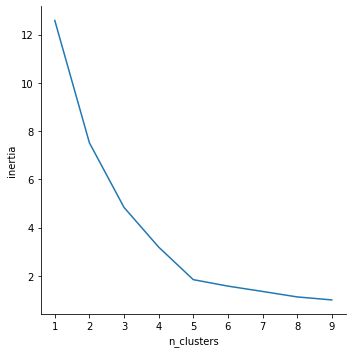

In [12]:
sns.relplot(data=clust_inert,x='n_clusters',y='inertia',kind='line')

Our largest acute angle is at n_clusters = 5

In [13]:
kmeans = KMeans(n_clusters=5, random_state=seed)
kmeans.fit(X_train[['annual_income','spending_score']])

KMeans(n_clusters=5, random_state=21)

In [14]:
clusts['scaled_cluster'] = kmeans.predict(X_train[['annual_income','spending_score']])

In [15]:
X_train.head()

,customer_id,age,annual_income,spending_score
135,0.678392,0.211538,0.475410,0.887755
78,0.391960,0.096154,0.319672,0.520408
50,0.251256,0.596154,0.221311,0.520408
163,0.819095,0.250000,0.540984,0.938776
141,0.708543,0.269231,0.491803,0.938776


In [17]:
sns.relplot(data=clusts,x='annual_income',y='spending_score',hue='cluster')

ValueError: Could not interpret value `cluster` for parameter `hue`

In [ ]:
inertia = []
seed = 21
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(X_train[['annual_income','spending_score','age']])
    inertia.append(kmeans.inertia_)

In [ ]:
clust_inert = pd.DataFrame({'n_clusters':list(range(1,10)),'inertia':inertia})

In [ ]:
sns.relplot(data=clust_inert,x='n_clusters',y='inertia',kind='line')

Largest acute angle is at n_clusters =4

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=seed)
kmeans.fit(X_train[['annual_income','spending_score','age']])
kmeans.predict(X_train[['annual_income','spending_score','age']])